# **Crop Production Analysis In India**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Crop Production data.csv to Crop Production data.csv


In [ ]:
df = pd.read_csv('/content/Crop Production data.csv')

# **Data Exploration and Cleaning**

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values\n", missing_values)

Missing Values
 State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [ ]:
duplicate_values = df.duplicated().sum()
print('Number of duplicates', duplicate_values)

Number of duplicates 0


In [ ]:
df['Production']

,Production
0,2000.0
1,1.0
2,321.0
3,641.0
4,165.0
...,...
246086,801.0
246087,463.0
246088,16250.0
246089,597899.0


In [ ]:
missing_percentage = df['Production'].isna().mean() * 100
print(f"Percentage of missing values in 'Production': {missing_percentage}%")

Percentage of missing values in 'Production': 1.5156994770227274%


In [ ]:
# Group by 'Crop' and 'Season' to count missing production values
missing_by_crop_season = df[df['Production'].isna()].groupby(['Crop', 'Season']).size().reset_index(name='Missing_Count')
print(missing_by_crop_season)

               Crop       Season  Missing_Count
0          Arecanut  Whole Year              39
1         Arhar/Tur  Kharif                  97
2         Arhar/Tur  Rabi                     3
3         Arhar/Tur  Whole Year               2
4             Bajra  Kharif                  42
..              ...          ...            ...
123           Wheat  Kharif                   4
124           Wheat  Rabi                    16
125           Wheat  Whole Year               1
126  other oilseeds  Kharif                  10
127  other oilseeds  Rabi                    29

[128 rows x 3 columns]


In [ ]:
# Drop rows where 'Production' is missing
df_cleaned = df.dropna(subset=['Production'])
print(f"After dropping rows, the dataset has {df_cleaned.shape[0]} rows.")

After dropping rows, the dataset has 242361 rows.


In [ ]:
df.to_csv('Cleaned_Crop_Production_Data.csv', index=False)

# **Data Analysis**

In [ ]:
print(df['State_Name'].unique())

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [ ]:
print(df['Crop'].unique())

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'


In [ ]:
print(df['Season'].unique())

['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']


**(a) Total production and area per crop:**

In [ ]:
crop_summary = df.groupby('Crop').agg({'Area': 'sum', 'Production': 'sum'}).reset_index()
print(crop_summary)

                    Crop          Area    Production
0                  Apple  9.000000e+00  0.000000e+00
1    Arcanut (Processed)  1.441160e+05  1.928310e+05
2               Arecanut  6.012013e+06  2.034659e+07
3              Arhar/Tur  5.779154e+07  3.933139e+07
4              Ash Gourd  1.644000e+03  0.000000e+00
..                   ...           ...           ...
119                Wheat  4.707136e+08  1.332826e+09
120                  Yam  1.775000e+03  0.000000e+00
121         other fibres  1.263800e+04  0.000000e+00
122   other misc. pulses  3.084300e+04  9.704220e+03
123       other oilseeds  2.249815e+06  4.769909e+06

[124 rows x 3 columns]


**(b) Production per year:**

In [ ]:
# Production per year
yearly_production = df.groupby('Crop_Year').agg({'Production': 'sum'}).reset_index()
print(yearly_production)

    Crop_Year    Production
0        1997  8.512329e+08
1        1998  5.825321e+09
2        1999  6.434666e+09
3        2000  7.449709e+09
4        2001  7.465541e+09
5        2002  7.696955e+09
6        2003  7.917974e+09
7        2004  8.189462e+09
8        2005  8.043757e+09
9        2006  8.681913e+09
10       2007  6.879442e+09
11       2008  7.717018e+09
12       2009  7.660494e+09
13       2010  6.307609e+09
14       2011  1.430890e+10
15       2012  8.171055e+09
16       2013  1.290359e+10
17       2014  8.664541e+09
18       2015  6.935065e+06


**(c) State-wise production analysis:**

In [ ]:
# Group by state to find total production per state
state_summary = df.groupby('State_Name').agg({'Production': 'sum', 'Area': 'sum'}).reset_index()
print(state_summary)

                     State_Name    Production          Area
0   Andaman and Nicobar Islands  7.182232e+08  3.378961e+05
1                Andhra Pradesh  1.732459e+10  1.315458e+08
2             Arunachal Pradesh  6.823913e+06  4.364346e+06
3                         Assam  2.111752e+09  7.037876e+07
4                         Bihar  3.664836e+08  1.282720e+08
5                    Chandigarh  6.395650e+04  1.252200e+04
6                  Chhattisgarh  1.009519e+08  8.303966e+07
7        Dadra and Nagar Haveli  1.847871e+06  3.965150e+05
8                           Goa  5.057558e+08  1.205680e+06
9                       Gujarat  5.242913e+08  1.549440e+08
10                      Haryana  3.812739e+08  8.959731e+07
11             Himachal Pradesh  1.780517e+07  1.000388e+07
12           Jammu and Kashmir   1.329102e+07  9.264623e+06
13                    Jharkhand  1.077774e+07  9.391046e+06
14                    Karnataka  8.634298e+08  2.029101e+08
15                       Kerala  9.78800

# **Data Visualisation**

**(a) Production per crop:**

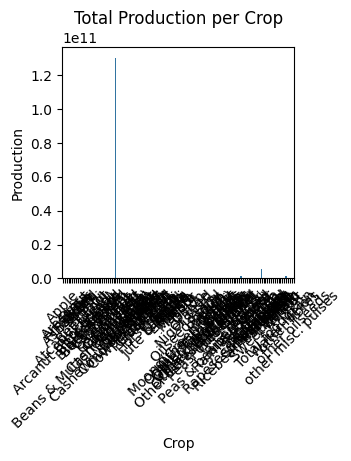

In [ ]:
# Bar plot for production per crop
plt.figure(figsize=(3, 3))
sns.barplot(x='Crop', y='Production', data=crop_summary)
plt.title('Total Production per Crop')
plt.xticks(rotation=45)
plt.show()

**(b) Yearly production trends:**

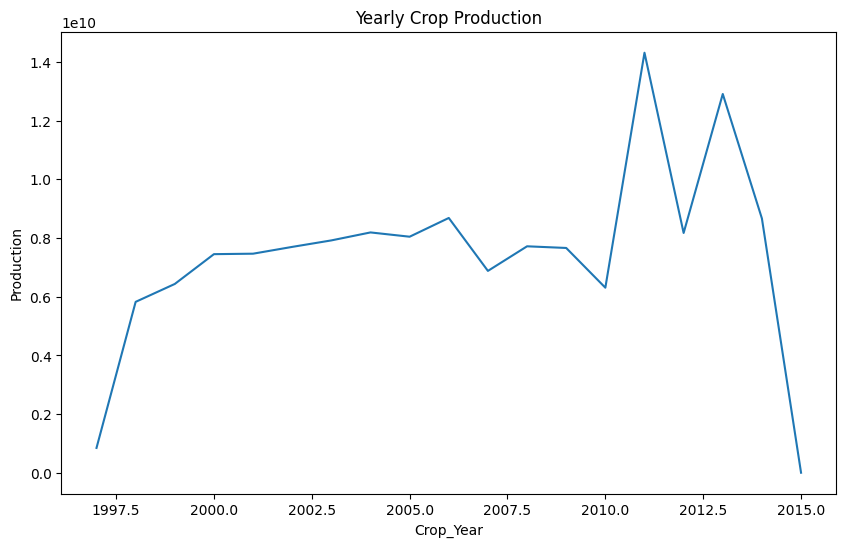

In [ ]:
# Line plot for production over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Production', data=yearly_production)
plt.title('Yearly Crop Production')
plt.show()

**(c) State-Wise Production:**

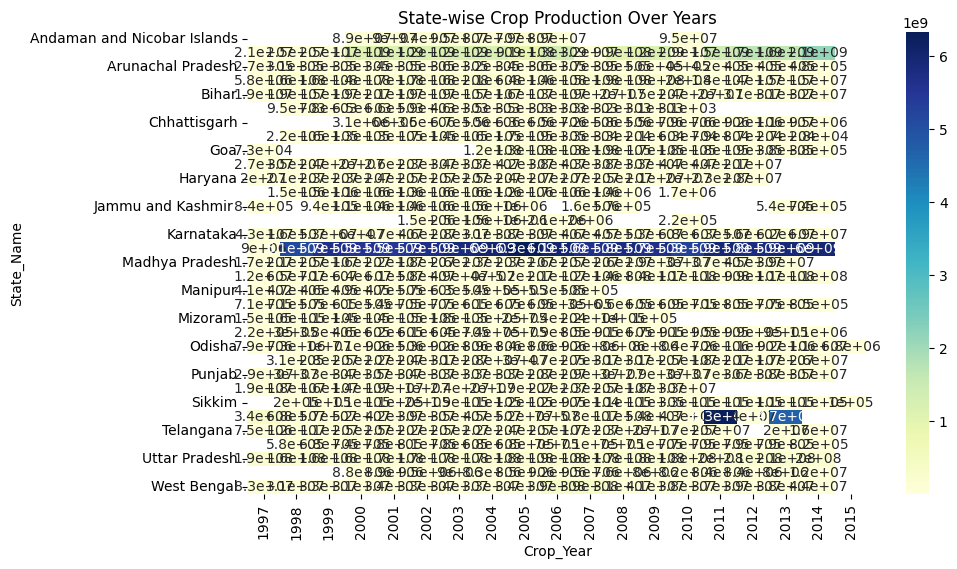

In [ ]:
# Heatmap for production by state (if multiple states are available)
plt.figure(figsize=(10, 6))
state_pivot = df.pivot_table(values='Production', index='State_Name', columns='Crop_Year', aggfunc='sum')
sns.heatmap(state_pivot, annot=True, cmap='YlGnBu')
plt.title('State-wise Crop Production Over Years')
plt.show()

# **Correlation Analysis**

In [ ]:
# Correlation between Area and Production
correlation = df[['Area', 'Production']].corr()
print(correlation)

                Area  Production
Area        1.000000    0.040587
Production  0.040587    1.000000
